<h1 style="color:#189AB4;font-size:80px;"><strong>Kaggle Survey <strong style="color:black">2021</strong></strong></h1>



## 필요한 라이브러리 불러옴

In [3]:


import gc # For Memory Optimization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud
from scipy.stats import norm

#차트에 이미지를 그리기 위한 라이브러리
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

#불필요한 warning 메세지 삭제
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 400)

<h1 style="color:#189AB4"><strong>데이터 확인</strong></h1>

In [5]:
# 데이터 가져옴

df = pd.read_csv('kaggle_survey_2021_responses.csv')
df = df.iloc[1:,:] # The first row was describing the columns. Better to look at the description from the Metadata file provided
df.head(3).style.set_properties(**{"background-color": "#76c5d6","color": "black", "border-color": "black"})

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_9,Q32_A_Part_10,Q32_A_Part_11,Q32_A_Part_12,Q32_A_Part_13,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_18,Q32_A_Part_19,Q32_A_Part_20,Q32_A_OTHER,Q33,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_14,Q34_A_Part_15,Q34_A_Part_16,Q34_A_OTHER,Q35,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B

In [6]:
# 행,열 확인

print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 25973
Number of columns: 369


<h1 style="color:#189AB4;font-size:60px;"><strong>User</strong> <strong style="color:black">Demographics:</strong></h1>

<h1 style="color:#189AB4"><strong>첫 번째 분석</strong> 나이</h1>

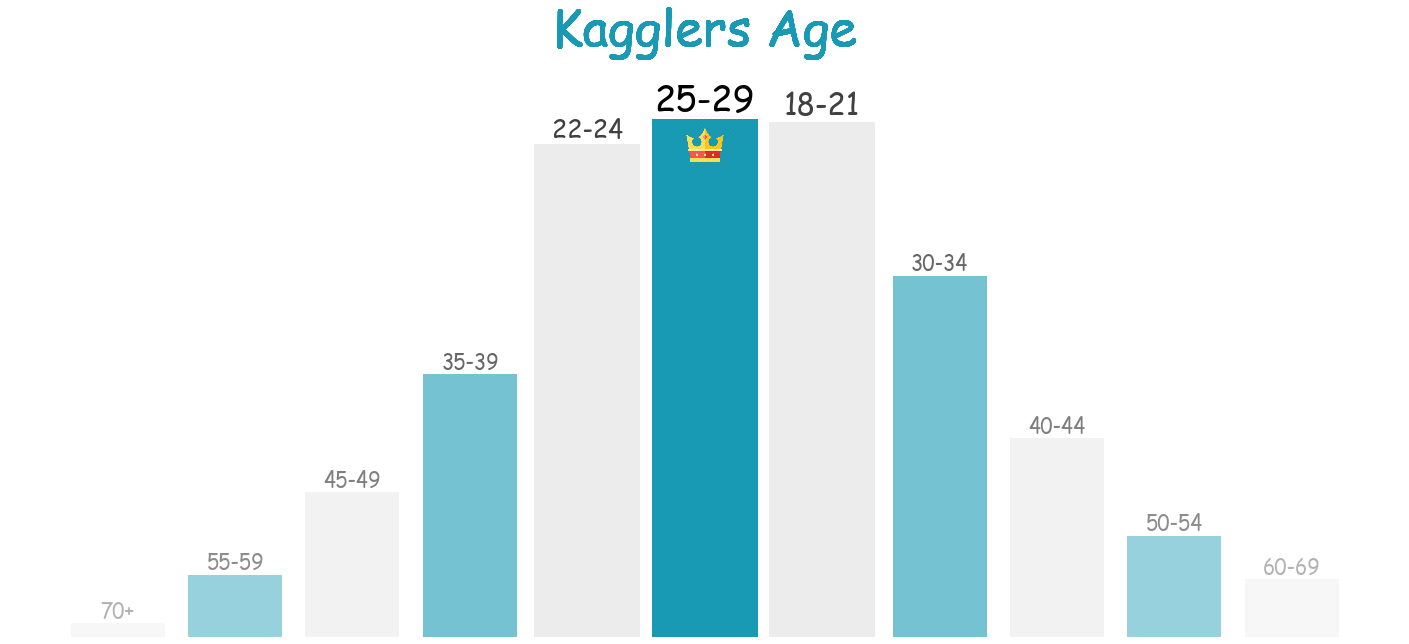

In [7]:
# Kagglers 연령 시각화. 

fig, ax = plt.subplots(figsize=(25,10), facecolor="w")

# Method for image
def make_img(img,zoom, x, y):
    img = mpimg.imread(img)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)

img_file = "https://www.freeiconspng.com/thumbs/crown-icon/queen-crown-icon-4.png"
zoom = 1
img_y= 4.8

# Creating a DataFrame to get the values and their counts (this was for my purpose)
# new_df = pd.DataFrame(df['Q1'].value_counts())

# I wanted to have the highest value in the middle, so i wrote the following two code lines
age_bucket = ['70+','55-59','45-49','35-39','22-24','25-29','18-21','30-34','40-44','50-54','60-69']   #new_df.index
age_bucket_cnt = [128,592,1375,2504,4694,4931,4901,3441,1890,964,553]   #list(new_df.Q1.values)

color = ['#E6E6E6', '#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6'] # Deciding the color
width = [0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.8, 0.8, 0.8, 0.8] # The Width
alpha = [0.3, 0.45, 0.5, 0.6, 0.75, 1.0, 0.75, 0.6, 0.5, 0.45, 0.3] # The Opacity

fontsize= [20, 20, 20, 20, 25, 35, 30, 20, 20, 20, 20]
x_num = [0,1,2,3,4,5,6,7,8,9,10]

for i in range(11):
    plt.bar(x=age_bucket[i],height=age_bucket_cnt[i], width=width[i], color=color[i], alpha=alpha[i])
    plt.text(s=age_bucket[i],x=x_num[i],y=age_bucket_cnt[i],va='bottom',ha='center',font='Comic Sans MS',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Kagglers Age",x=5,y=5500,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')

# Placing the image
make_img(img_file,0.2, 5, 4700)    
    
gc.collect() # For Memory Optimization

plt.axis('off')
plt.show()

<h1 style="color:#189AB4"><strong>분석 내용</strong></h1>

<p style="font-size:120%">캐글러의 대부분이 <mark> 21-29세 </mark>이다.</strong>.</p>
<p style="font-size:120%">50세가 넘은 케글러는 거의 없다 .</p>

<h1 style="color:#189AB4"><strong>두 번째 분석</strong> 성별</h1>

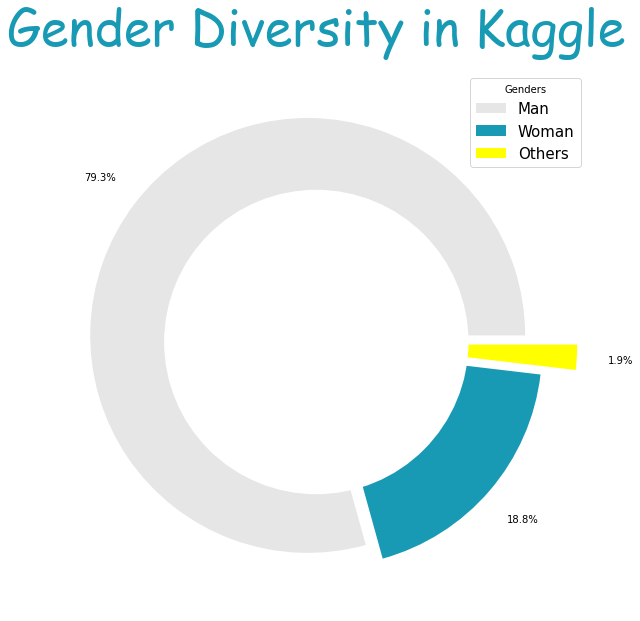

In [8]:
# 레이블 설정
Gender = ['Man', 'Woman', 'Others']
  
# 차트 크기 설정
Gender_cnt = [20598, 4890, 485]
  
# 색깔
colors = ['#E6E6E6', '#189AB4', '#FFFF00', 
          '#ADFF2F', '#FFA500']
# explosion
explode = (0.05, 0.05, 0.2)
  
    
plt.figure(figsize=[20,10])    
# Pie Chart
plt.pie(Gender_cnt, colors=colors,
        autopct='%1.1f%%', pctdistance=1.2,
        explode=explode,)
  
# 원
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

plt.legend(Gender, loc = "upper right",title="Genders", prop={'size': 15})
     
# 원형차트에 원 추가하기
fig.gca().add_artist(centre_circle)
  
plt.rcParams['font.size'] = 25    
# 차트 제목 추가
plt.text(s="Gender Diversity in Kaggle",x=0,y=1.3,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')
  
gc.collect()    
# 이동 차트
plt.show()

<h1 style="color:#189AB4"><strong>분석내용</strong></h1>

<p style="font-size:120%">케글 이용자 80%가 남성이다</p>
<p style="font-size:120%">여성의 비율은 18%이다</p>
<p style="font-size:120%">약 2% 사람들은 성별 공개를 하지 않는다.</p>

<h1 style="color:#189AB4"><strong>국적</strong></h1>

In [10]:
# geopandas : 지도 시각화  
import geopandas as gpd

# 조사할 나라
lis_countries = ["Algeria","Argentina","Australia","Austria","Bangladesh","Belarus","Belgium","Brazil","Canada","Chile","China","Colombia",
                 "Czechia","Denmark","Ecuador","Egypt","Ethiopia","France","Germany","Ghana","Greece","India","Indonesia","Iraq","Ireland",
                 "Israel","Italy","Japan","Kazakhstan","Kenya","Malaysia","Mexico","Morocco","Nepal","Netherlands","Nigeria","Norway","Pakistan",
                 "Peru","Philippines","Poland","Portugal","Romania","Russia","Saudi Arabia","South Africa","South Korea","Spain","Sri Lanka",
                 "Sweden","Switzerland","Taiwan","Thailand","Tunisia","Turkey","Uganda","Ukraine","United Arab Emirates","United Kingdom",
                 "United States of America","Vietnam"]

# 데이터 불러옴
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_data = lis_countries 
country_geo = list(world['name']) # 국가 리스트

# List of all the values of population of Kagglers from each country
lis_pop = [44,182,264,51,317,51,65,751,331,102,814,225,63,48,50,482,43,401,470,99,102,7434,444,43,84,138,311,921,45,248,156,279,140,75,153,
           702,45,530,117,108,219,119,61,742,89,146,359,454,106,81,71,334,123,109,416,47,186,111,550,2650,277]

# lis_counties 및 lis_pop이 포함된 데이터 프레임 생성
our_country_analysis = pd.DataFrame(lis_countries, columns=['Country'])
our_country_analysis['KagglePopulation'] = lis_pop

# 시각화
mapped = world.set_index('name').join(our_country_analysis.set_index('Country')).reset_index()

to_be_mapped = 'KagglePopulation'
vmin, vmax = 0,10000
fig, ax = plt.subplots(1, figsize=(25,30))

mapped.dropna().plot(column=to_be_mapped, cmap='cividis', linewidth=0.8, ax=ax, edgecolors='1', alpha=0.7)

ax.text(s="Kagglers All Around the Globe",x=0,y=100,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')
ax.set_axis_off()

sm = plt.cm.ScalarMappable(cmap='cividis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

gc.collect()
cbar = fig.colorbar(sm, orientation='vertical', shrink= .25)

ModuleNotFoundError: No module named 'geopandas'

<h1 style="color:#189AB4"><strong>분석내용</strong></h1>

<p style="font-size:120%">포화도가 높을수록 캐글을 이용하는 사람 수가 많다는 것인데 [인도,미국,한국,일본,중국]에 많음을 알 수 있다.</p>
<p style="font-size:120%">[카자흐스탄, 노르웨이, 알제리,에티오피아]는 매우 적은 수의 사람들이 이용하고 있음.</p>

<h1 style="color:#189AB4;font-size:60px;"><strong>User</strong> <strong style="color:black">Qualifications & Experience:</strong></h1>

<h1 style="color:#189AB4"><strong>정규교육</strong></h1>

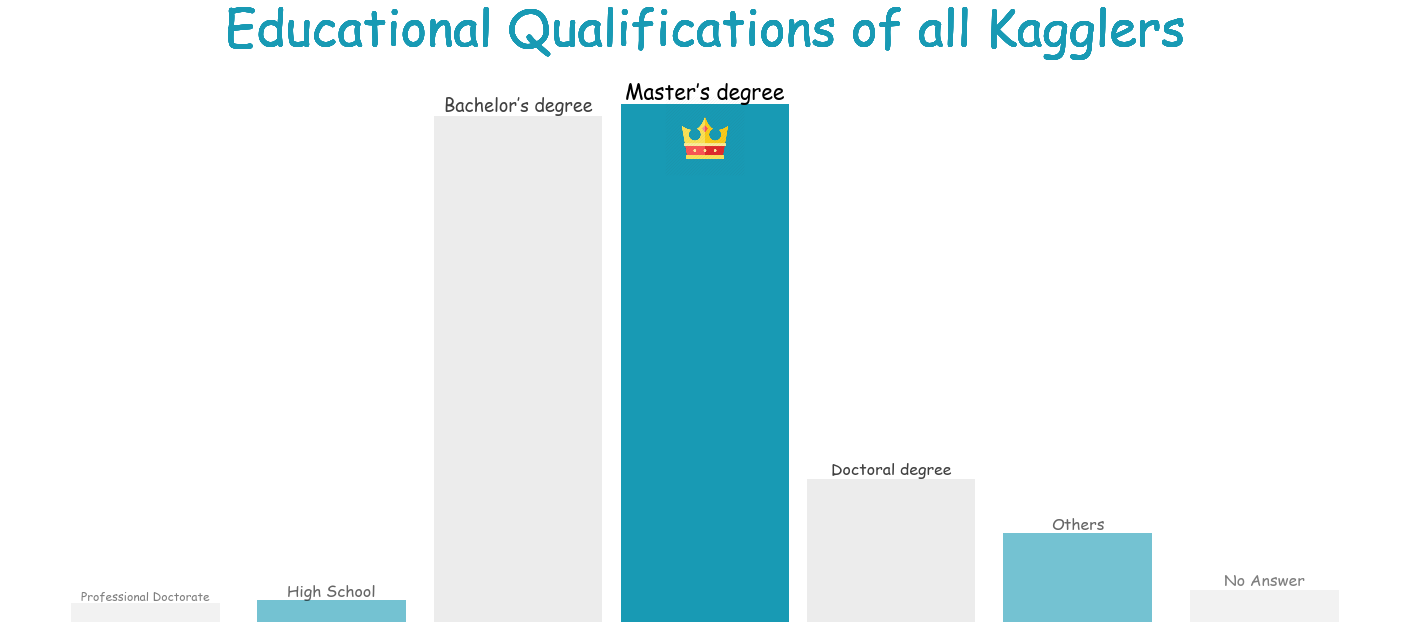

In [11]:
# 정규교육수준 시각화

fig, ax = plt.subplots(figsize=(25,10), facecolor="w")

# 이미지 방법
def make_img(img,zoom, x, y):
    img = mpimg.imread(img)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)

img_file = "https://www.freeiconspng.com/thumbs/crown-icon/queen-crown-icon-4.png"
zoom = 1
img_y= 4.8

# 데이터 프레임 만들기
# new_df = pd.DataFrame(df['Q1'].value_counts())

# 중간에 가장 높은 값을 보이기 위한 코드
age_bucket = ['Professional Doctorate','High School','Bachelor’s degree','Master’s degree','Doctoral degree','Others','No Answer']   #new_df.index
age_bucket_cnt = [360,417,9907,10132,2795,1735,627]   #list(new_df.Q1.values)

color = ['#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6'] # Deciding the color
width = [0.8, 0.8, 0.9, 0.9, 0.9, 0.8, 0.8,] # The Width
alpha = [0.5, 0.6, 0.75, 1.0, 0.75, 0.6, 0.5] # The Opacity

fontsize= [12, 16, 18, 21, 16, 16, 16]
x_num = [0,1,2,3,4,5,6]

for i in range(7):
    plt.bar(x=age_bucket[i],height=age_bucket_cnt[i], width=width[i], color=color[i], alpha=alpha[i])
    plt.text(s=age_bucket[i],x=x_num[i],y=age_bucket_cnt[i],va='bottom',ha='center',font='Comic Sans MS',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Educational Qualifications of all Kagglers",x=3,y=11000,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')

# 이미지 배치
make_img(img_file,0.25, 3, 9500)      
    
gc.collect() # 메모리 최적화

plt.axis('off')
plt.show()

<h1 style="color:#189AB4"><strong>분석내용</strong></h1>

<p style="font-size:120%">대부분 석사나 학사 학위를 갖고 있음</strong></p>
<p style="font-size:120%">고등학교 졸업 후 전문박사학위를 받거나 정규교육을 받지 않은 사람은 거의 없음</p>

<h1 style="color:#189AB4"><strong>직업</strong></h1>

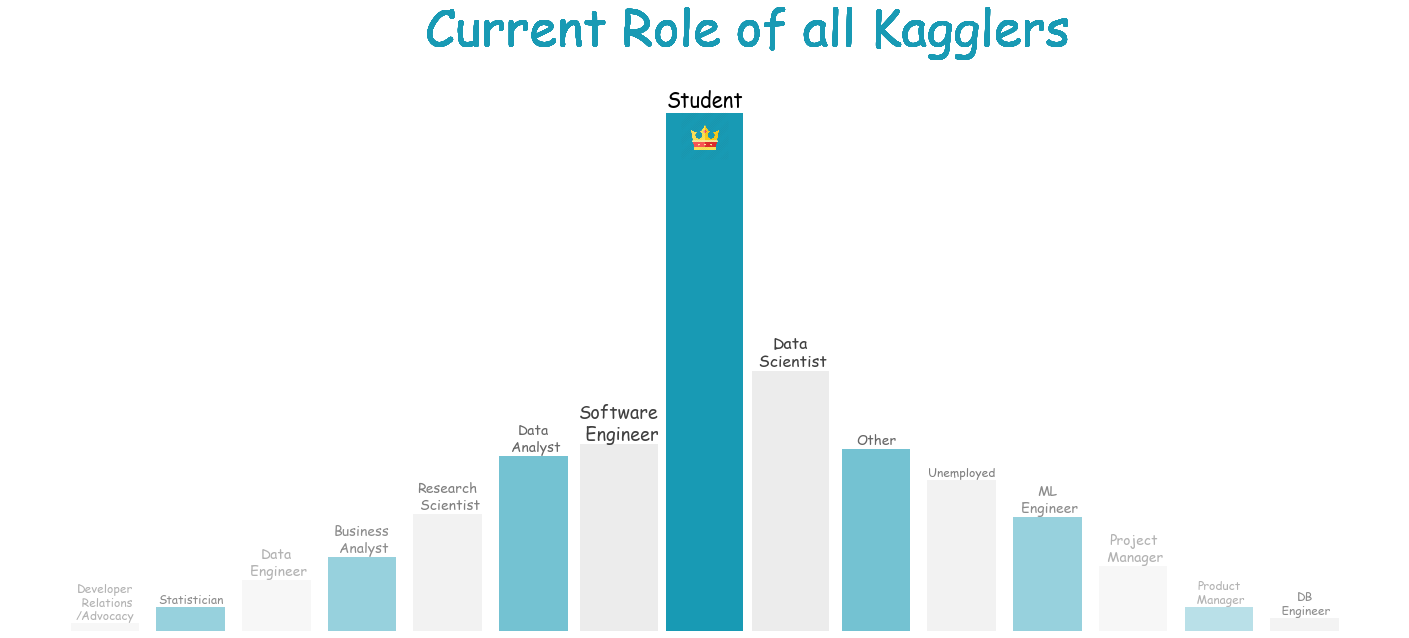

In [12]:
# 현재 직업 시각화

# image
def make_img(img,zoom, x, y):
    img = mpimg.imread(img)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)

img_file = "https://www.freeiconspng.com/thumbs/crown-icon/queen-crown-icon-4.png"
zoom = 1
img_y= 4.8

fig, ax = plt.subplots(figsize=(25,10), facecolor="w")

# 데이터 프레임 생성
# new_df = pd.DataFrame(df['Q1'].value_counts())

# 중간에 가장 높은 값을 보이기 위한 코드
age_bucket = ['Developer\n Relations\n/Advocacy','Statistician','Data\n Engineer','Business\n Analyst','Research\n Scientist','Data\n Analyst','Software\n Engineer','Student',
              'Data\n Scientist','Other','Unemployed','ML\n Engineer','Project\n Manager','Product\n Manager','DB\n Engineer']   #new_df.index
age_bucket_cnt = [99,313,668,968,1538,2301,2449,6804,3414,2393,1986,1499,849,319,171]   #list(new_df.Q1.values)

color = ['#E6E6E6', '#189AB4', '#E6E6E6', '#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4', '#E6E6E6'] # Deciding the color
width = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8] # The Width
alpha = [0.3, 0.45, 0.3, 0.45, 0.5, 0.6, 0.75, 1.0, 0.75, 0.6, 0.5, 0.45, 0.3, 0.3, 0.45] # The Opacity

fontsize= [12, 12, 14, 14, 14, 14, 18, 20, 16, 14, 12, 14, 14, 12, 12]
x_num = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

for i in range(15):
    plt.bar(x=age_bucket[i],height=age_bucket_cnt[i], width=width[i], color=color[i], alpha=alpha[i])
    plt.text(s=age_bucket[i],x=x_num[i],y=age_bucket_cnt[i],va='bottom',ha='center',font='Comic Sans MS',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Current Role of all Kagglers",x=7.5,y=7500,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')

# 이미지 배치
make_img(img_file,0.15, 7, 6500)        
    
gc.collect() # 메모리 최적화

plt.axis('off')
plt.show()

<h1 style="color:#189AB4"><strong>분석 내용</strong></h1>

<p style="font-size:120%">대부분의 캐글을 이용하는 사람은 '학생'이다.</p>
<p style="font-size:120%">'기타' 막대가 높을 것을 보아서 다양한 직업들의 사람들이 캐글을 이용하는 것을 알 수 있다.</p>

<h1 style="color:#189AB4"><strong>프로그래밍 경력</strong></h1>

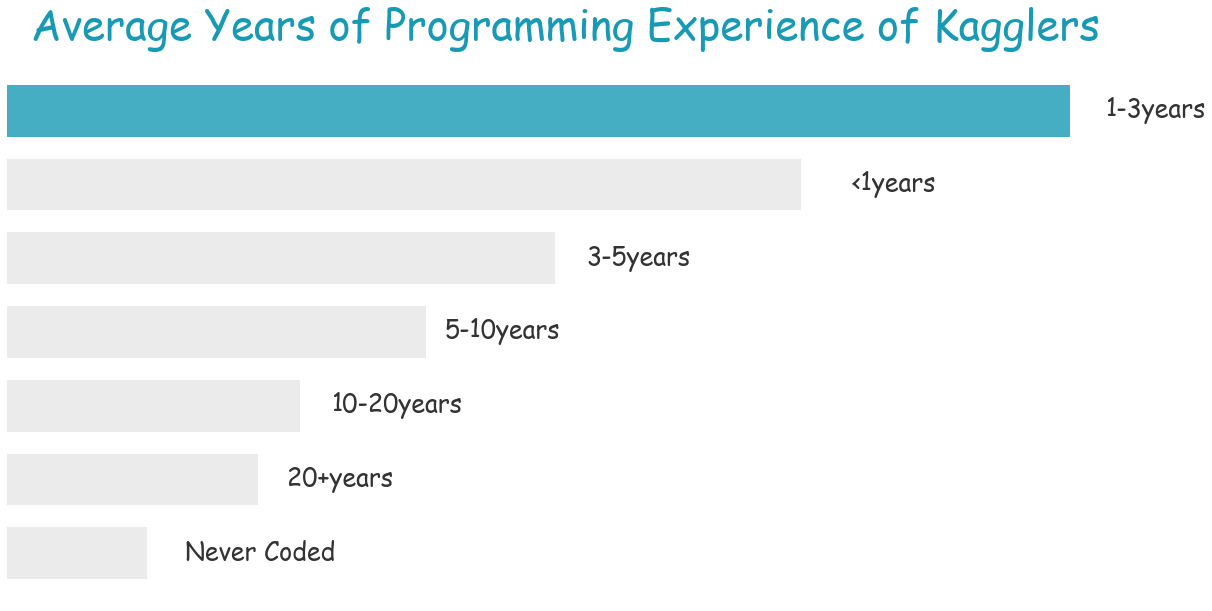

In [13]:
# 프로그래밍 경력 시각화

years_bin = ['1-3years','<1years','3-5years','5-10years','10-20years','20+years','Never Coded']
years_cnt = [7874, 5881, 4061, 3099, 2166, 1860, 1032]

fig = plt.figure(figsize=(20,10))
plt.barh(width=years_cnt, y=years_bin, height=0.7, color = ['#189AB4', '#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6', '#E6E6E6', '#E6E6E6'], alpha=0.8)

##################### 경력 범위 ###################################
s1 = ['1-3years','<1years','3-5years','5-10years','10-20years','20+years','Never Coded']
x1 = [8874, 6881, 5061, 4099, 3366, 2860, 2432]
y1 = [0,1,2,3,4,5,6]


for i in range(7):
    plt.text(s = s1[i], x=x1[i], y=y1[i] ,font = 'Comic Sans MS', fontsize=25,va='center',ha='right',alpha=0.8)

plt.title("Average Years of Programming Experience of Kagglers",font='Comic Sans MS', fontsize=42, pad=20, color='#189AB4')
plt.axis('off')
plt.gca().invert_yaxis()
plt.show()

<h1 style="color:#189AB4"><strong>분석내용</strong></h1>

<p style="font-size:120%">프로그래밍 경력이 1-3년 사이의 캐글러가 가장 많다</p>
<p style="font-size:120%">경력이 많을수록 캐글 참여도가 떨어진다.</p>

<h1 style="color:#189AB4"><strong>언어</strong></h1>

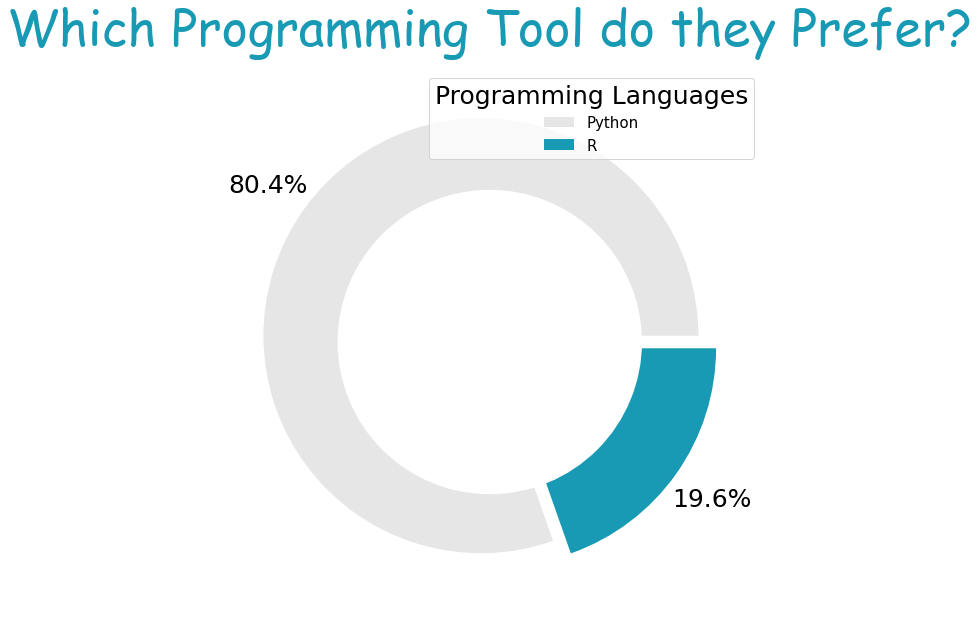

In [14]:
# 레이블 설정
Tool = ['Python', 'R']
  
# 차트 크기 설정
# given values
Tool_cnt = [21860, 5334]
  
# 색
colors = ['#E6E6E6', '#189AB4']

# explosion
explode = (0.05, 0.05)
  

plt.figure(figsize=[20,10])   

# 원형 차트
plt.pie(Tool_cnt, colors=colors,
        autopct='%1.1f%%', pctdistance=1.2,
        explode=explode,)
  

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

plt.legend(Tool, loc = "upper right",title="Programming Languages", prop={'size': 15})
     
# 원형차트에 원 추가
fig.gca().add_artist(centre_circle)
  
plt.rcParams['font.size'] = 25    
# 제목 설정
plt.text(s="Which Programming Tool do they Prefer?",x=0,y=1.3,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')
  
gc.collect()    
# 차트 
plt.show()

<h1 style="color:#189AB4"><strong>분석내용</strong></h1>

<p style="font-size:120%">대부분 캐글러들이 python을 사용하고 있다.</p>
<p style="font-size:120%">앞선 분석에서 대부분의 캐글을 이용하는 사람들이 경력이 1-3년의 학생인것을 생각하면 파이썬은 초보자들이 익히고 배우는데 좋은 언어임을 알 수 있다.</p>

![meme](https://i.pinimg.com/originals/a4/31/4a/a4314a37a2a0a1ce775d55b4c8b1383d.png)



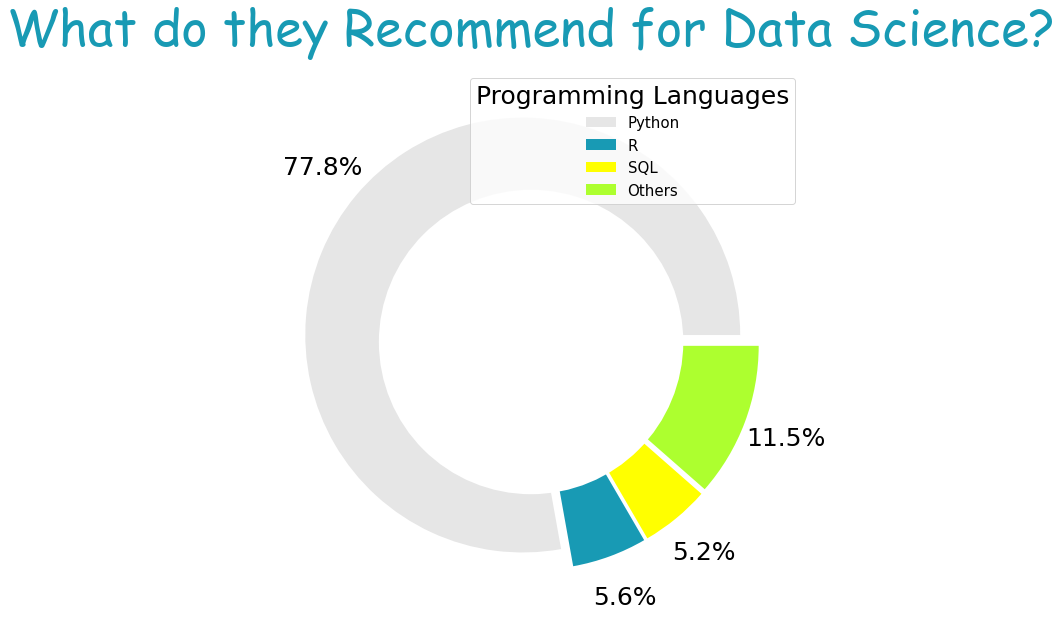

In [15]:
# Fixing the values for 'Q8'
df['Q8'] = df['Q8'].apply(lambda x: 'Others' if x not in ['Python','R','SQL'] else x)
df['Q8'].value_counts()

# 차트 항목 레이블 설정
Tool = ['Python', 'R', 'SQL', 'Others']
  
# 차트 크기 설정
# given values
Tool_cnt = [20213, 1445, 1338, 2977]
  
# 색깔
colors = ['#E6E6E6', '#189AB4', '#FFFF00', '#ADFF2F']

# explosion
explode = (0.05, 0.05, 0.05, 0.05)
  

plt.figure(figsize=[20,10])   

# Pie 차트
plt.pie(Tool_cnt, colors=colors,
        autopct='%1.1f%%', pctdistance=1.2,
        explode=explode,)
  
# 원형
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

plt.legend(Tool, loc = "upper right",title="Programming Languages", prop={'size': 15})
     
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
plt.rcParams['font.size'] = 25    
# 제목 추가
plt.text(s="What do they Recommend for Data Science?",x=0,y=1.3,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')
  
gc.collect()    
# 차트
plt.show()

<h1 style="color:#189AB4"><strong>분석결과</strong></h1>

<p style="font-size:120%">자바,c++,c 등과 여러 프로그래밍 언어가 사용되지만, 파이썬이 가장 많이 사용됨</p>
<p style="font-size:120%">이전 분석에서 많은 캐글러가 파이썬을 선호한다는 것을 알 수 있는데, 70%이상의 사람들이 다른 프로그래밍언어보다 파이썬을 추천한다는 것을 알 수 있음.</p>

<h1 style="color:#189AB4"><strong>IDE 선호</strong></h1>

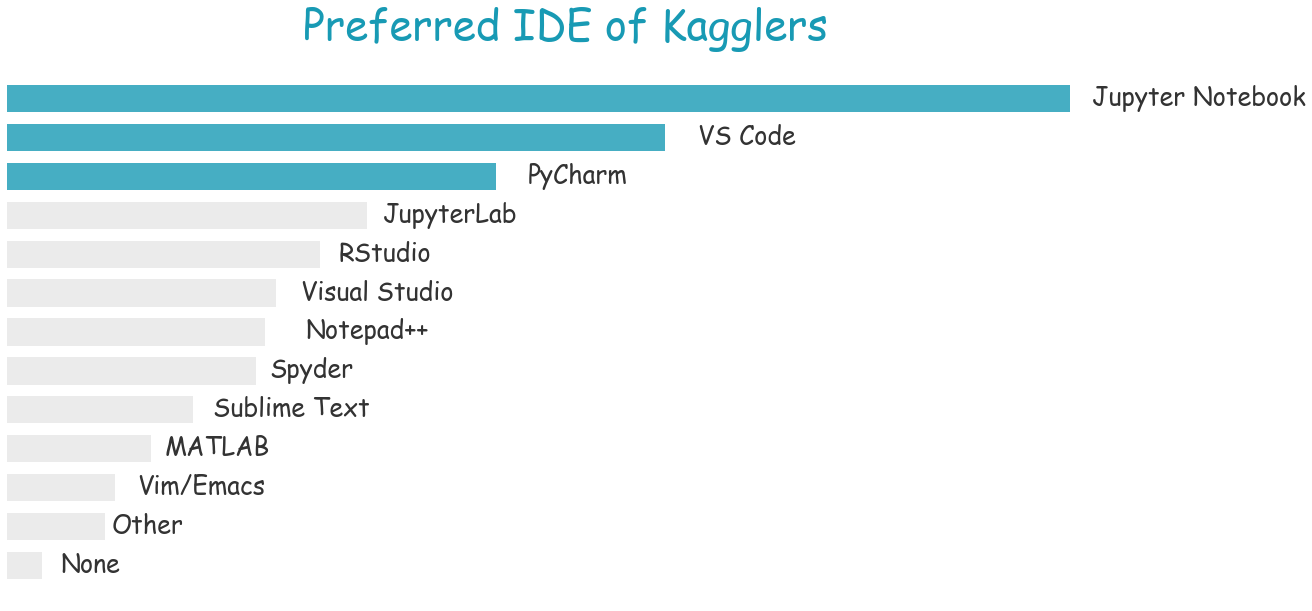

In [16]:
# ide 이름 및 값 가져옴
name = ['JupyterLab','RStudio','Visual Studio','VS Code','PyCharm','Spyder','Notepad++','Sublime Text','Vim/Emacs','MATLAB','Jupyter Notebook','None','Other']
value = [5488,4771,4110,10040,7468,3794,3937,2839,1646,2203,16233,526,1491]

# 데이터 프레임 만들기
df_nine_ = pd.DataFrame(name, columns=['IDE'])
df_nine_['Values'] = value
df_nine_ = df_nine_.sort_values(by="Values", ascending=False)
df_nine_

fig = plt.figure(figsize=(20,10))
plt.barh(width=list(df_nine_['Values'].unique()), y=list(df_nine_['IDE'].unique()), height=0.7, color = ['#189AB4', '#189AB4', '#189AB4', '#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6', '#E6E6E6', '#E6E6E6', '#E6E6E6', '#E6E6E6', '#E6E6E6', '#E6E6E6'], alpha=0.8)

##################### For the Years of Experience ###################################
s1 = list(df_nine_['IDE'].unique())
x1 = [19833,12040,9468,7788,6471,6810,6437,5294,5539,4003,3946,2691,1726]
y1 = [0,1,2,3,4,5,6,7,8,9,10,11,12]


for i in range(13):
    plt.text(s = s1[i], x=x1[i], y=y1[i] ,font = 'Comic Sans MS', fontsize=25,va='center',ha='right',alpha=0.8)


plt.title("Preferred IDE of Kagglers",font='Comic Sans MS', fontsize=42, pad=20, color='#189AB4')
plt.axis('off')
plt.gca().invert_yaxis()
gc.collect()
plt.show()

<h1 style="color:#189AB4"><strong>분석 결과</strong></h1>

<p style="font-size:120%">주피터 노트북이 가장 많은 사용자가 사용하는 것으로 나옴.</p>
<p style="font-size:120%">주피터 노트북과 마찬가지로 vs code, pycharm 역시 사용친화적이기때문에 많은 사람들이 이용하는 것을 알 수 있음.</p>

<h1 style="color:#189AB4"><strong>hosted notebook 선호</strong></h1>

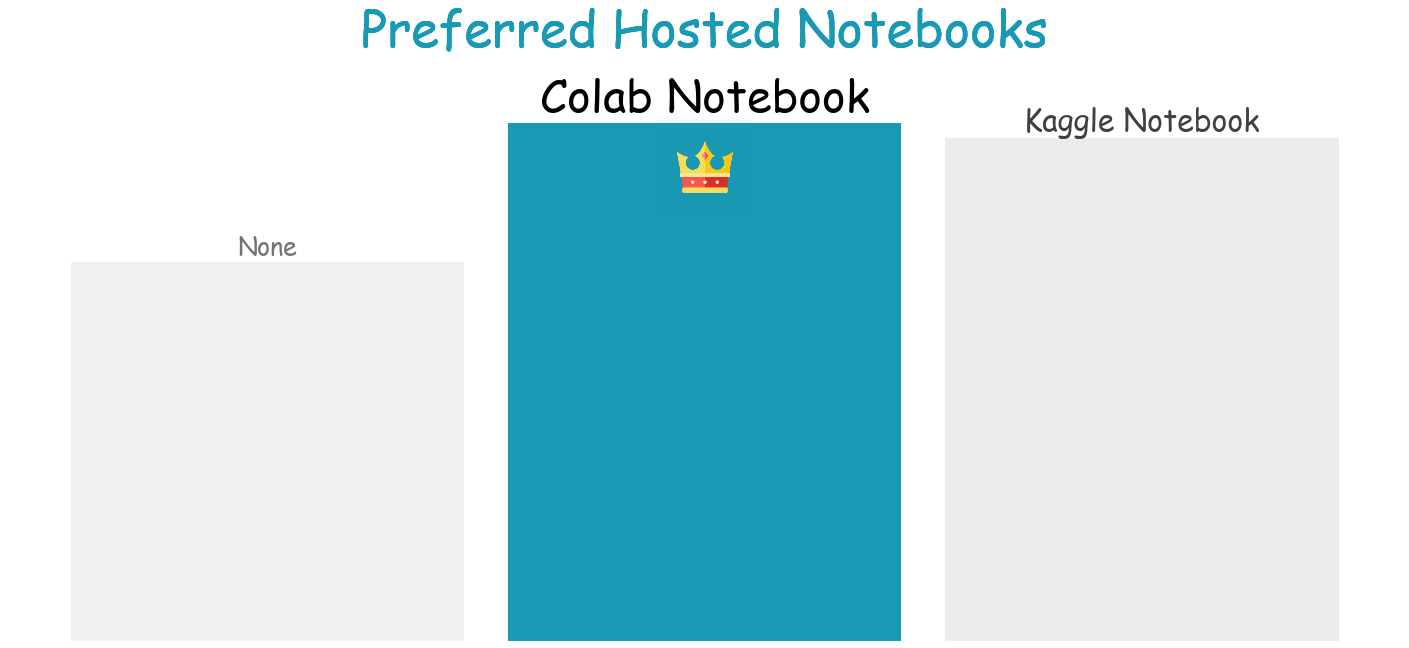

In [17]:
# 이미지 표현 방법
def make_img(img,zoom, x, y):
    img = mpimg.imread(img)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)

img_file = "https://www.freeiconspng.com/thumbs/crown-icon/queen-crown-icon-4.png"
zoom = 1
img_y= 4.8


# hosted notebook 선호도 시각화

fig, ax = plt.subplots(figsize=(25,10), facecolor="w")

# 데이터 프레임 생성
# new_df = pd.DataFrame(df['Q1'].value_counts())

# 중간에 가장 높은 값을 나타내기 위한 코드
age_bucket = ['None','Colab Notebook','Kaggle Notebook']   #new_df.index
age_bucket_cnt = [7174,9792,9507]   #list(new_df.Q1.values)

color = ['#E6E6E6','#189AB4','#E6E6E6'] # Deciding the color
width = [0.9, 0.9, 0.9] # The Width
alpha = [0.55, 1.0, 0.75] # The Opacity

fontsize= [25, 45, 30]
x_num = [0,1,2]

for i in range(3):
    plt.bar(x=age_bucket[i],height=age_bucket_cnt[i], width=width[i], color=color[i], alpha=alpha[i])
    plt.text(s=age_bucket[i],x=x_num[i],y=age_bucket_cnt[i],va='bottom',ha='center',font='Comic Sans MS',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Preferred Hosted Notebooks",x=1,y=11000,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')

# 이미지 배치
make_img(img_file,0.3, 1, 9000)    
    
gc.collect() # 메모리 최적화

plt.axis('off')
plt.show()

<h1 style="color:#189AB4"><strong>분석 결과</strong></h1>

<p style="font-size:120%">분석결과 구글 코랩이 캐글 노트북보다 근소한 차이로 더 많이 사용하는 것으로 나타났다.</p>
<p style="font-size:120%">   + 구글 코랩은 사용이 간단하면 ,GPU사용에 제한이 없다. 또한  구글 드라이브에서 데이터 세트를 가져올 수 있어 편리함</p>

<h1 style="color:#189AB4"><strong>워드클라우드 시각화</strong></h1>

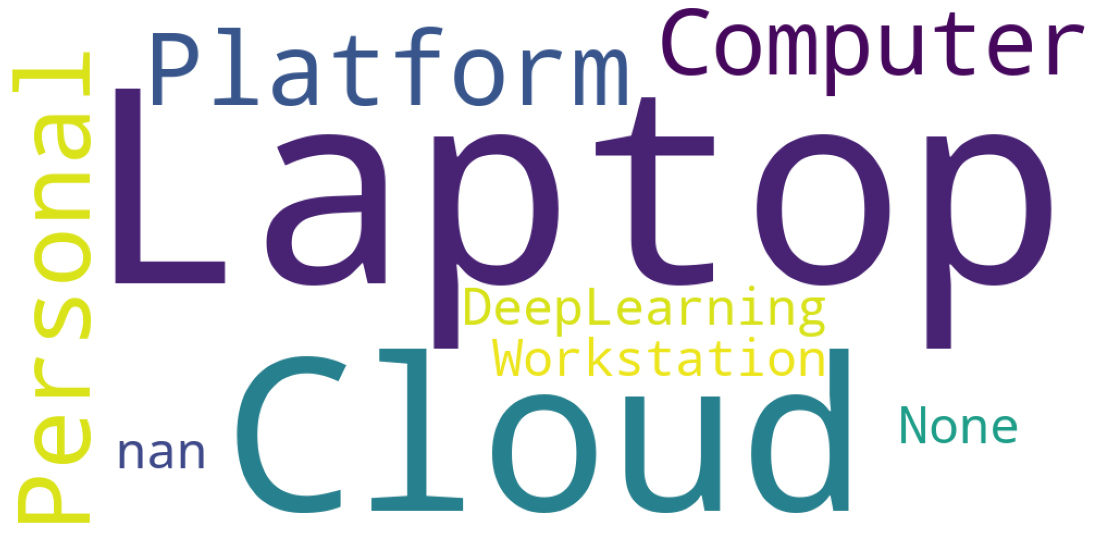

In [18]:
# 데이터 수정
df['Q11']=df['Q11'].map({"A laptop":"Laptop","A personal computer / desktop":"Personal Computer",
                         "A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)":"Cloud Platform",
                         "A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)":"DeepLearning Workstation","None":"None","Other":"Other"})
df['Q11']=df['Q11'].astype(str)

df['Q11'].value_counts()


# 고유값 가져옴
name= df['Q11'].unique()

# numpy 배열을 문자열로 변경
name_str = ",".join(name)

#변경한 문자열로 워드클라우드 생성
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', collocations=False).generate(name_str)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

<h1 style="color:#189AB4"><strong>분석결과</strong></h1>

<p style="font-size:120%">워드 클라우드를 통해 대부분 캐글러가 노트북을 사용하는 것을 선호함을 알 수 있다. 그 외 클라우드 플랫폼과 개인 컴퓨터도 선호</p>
<p style="font-size:120%">일반적으로 컴퓨터 학습 라이브러리를 실행할 수 있을 만큼 호횐되지 않는 노트북 또는 개인용 컴퓨터 경우 차선책이 클라우드 컴퓨팅 플랫폼이라는 것을 알 수 있음.</mark></p>

<h1 style="color:#189AB4"><strong>하드웨어 선호</strong></h1>

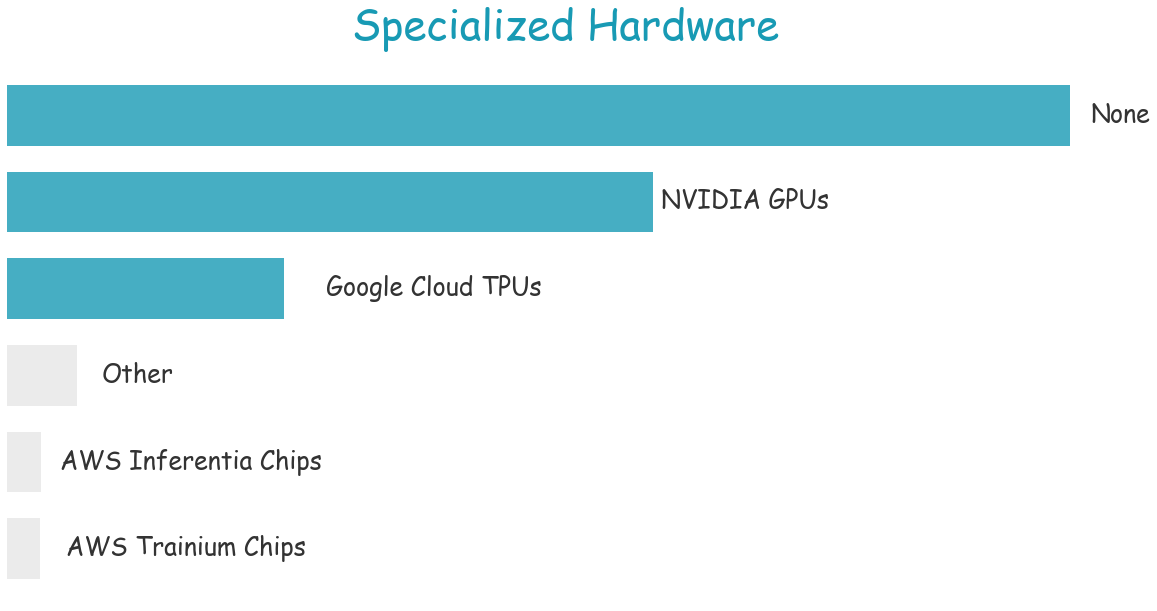

In [19]:
# 값과 카운트 가져오기
name = ["None","NVIDIA GPUs","Google Cloud TPUs","Other","AWS Inferentia Chips","AWS Trainium Chips"]
count = [13234,8036,3451,867,416,414]

# 막대 그래프 
fig = plt.figure(figsize=(20,10))
plt.barh(width=count, y=name, height=0.7, color = ['#189AB4', '#189AB4', '#189AB4', '#E6E6E6','#E6E6E6','#E6E6E6'], alpha=0.8)

##################### For the Years of Experience ###################################
s1 = name
x1 = [14234,10236,6651,2067,3916,3714]
y1 = [0,1,2,3,4,5]


for i in range(6):
    plt.text(s = s1[i], x=x1[i], y=y1[i] ,font = 'Comic Sans MS', fontsize=25,va='center',ha='right',alpha=0.8)

plt.title("Specialized Hardware",font='Comic Sans MS', fontsize=42, pad=20, color='#189AB4')
plt.axis('off')
plt.gca().invert_yaxis()
gc.collect()
plt.show()

<h1 style="color:#189AB4"><strong>분석결과</strong></h1>

<p style="font-size:120%">Nvidia GPU는 머신러닝 모델을 더 빨리 처리할 수 있어서 선호도가 높다</p>
<p style="font-size:120%">그 뒤로 TPU를 선호함</p>
<p style="font-size:120%">하드웨어를 사용하지 않는 캐글러도 많은데 이는 대부분의 캐글러가 컴퓨팅 성능을 높이기 위해 하드웨어가 필요하지 않다고 생각함을 알 수 있음</p>

<h1 style="color:#189AB4"><strong>TPU 사용</strong></h1>

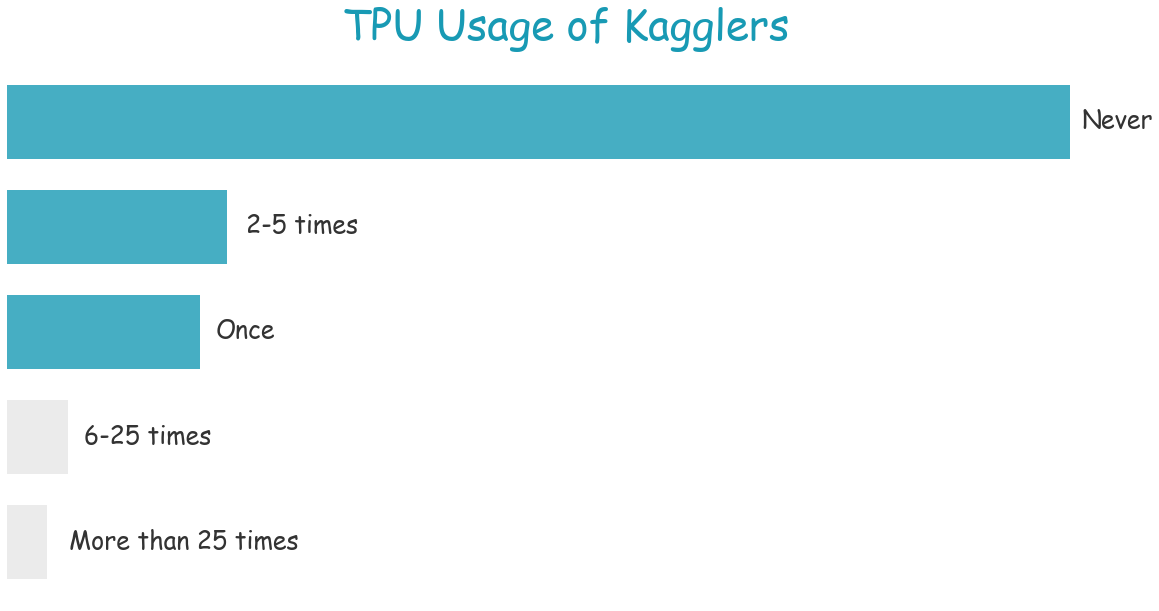

In [20]:
# 막대 그래프 시각화
name = ['Never','2-5 times','Once','6-25 times','More than 25 times']
count = list(df['Q13'].value_counts())

fig = plt.figure(figsize=(20,10))
plt.barh(width=count, y=name, height=0.7, color = ['#189AB4', '#189AB4', '#189AB4', '#E6E6E6','#E6E6E6'], alpha=0.8)

##################### For the Years of Experience ###################################
s1 = name
x1 = [17734,5436,4151,3167,4516]
y1 = [0,1,2,3,4]


for i in range(5):
    plt.text(s = s1[i], x=x1[i], y=y1[i] ,font = 'Comic Sans MS', fontsize=25,va='center',ha='right',alpha=0.8)

plt.title("TPU Usage of Kagglers",font='Comic Sans MS', fontsize=42, pad=20, color='#189AB4')
plt.axis('off')
plt.gca().invert_yaxis()
gc.collect()
plt.show()

<h1 style="color:#189AB4"><strong>∞ 분석내용 </strong></h1>


<p style="font-size:120%">TPU는 캐글에서 사용할 수 있으며, 대회 기간 중 또는 기타 딥러닝 컴퓨터 비전 용도로 주로 사용</p>


<p style="font-size:120%">캐글러들은 [주 2-5회], 혹은 가끔 한 번씩 사용함</p>
<p style="font-size:120%">대부분의 사람들이 TPU를 사용하지 않는 이유는 GPU를 사용하지 않는 이유와 거의 같다</p>